In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [16]:
#project_dir="results/projects/240117llama7b"
#project_dir="results/projects/240122llama2_13b_self_reasoning_10/"
#project_dir="results/projects/240119mixtral_self_reasoning_10/"

project_dir="results/projects/240122llama2_7b_self_reasoning_10/"
project_dir="results/projects/240124mixtral_self_reasoning_err10_10/"

In [17]:
result_list=[]

def load_data(project_dir,prefix="test_"):
    for path in glob.glob(f"{project_dir}/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        generation=path.split("/")[-1].split("_")[1]
        generation=int(generation)

        mode=path.split("/")[-1].split("_")[0]
        d["generation"]=generation
        d["mode"]=mode

        #count self_reasoning data
        self_reasoning_records=0
        for gen in range(0,generation+1):
            self_reasoning_records+=len(glob.glob(f"{project_dir}/self_reasoning/{gen}_*.json"))

        d["Self-reasoning records"]=self_reasoning_records
        result_list.append(d)

    return result_list

#train_result_list=load_data(project_dir,"train_")
#test_result_list=load_data(project_dir,"test_")
result_list=load_data(project_dir,"")

In [18]:
result_df=pd.DataFrame(result_list)
result_df

,MSE,MAE,R2,Answer ratio,plot,generation,mode,Self-reasoning records
0,4250.125450,45.899000,0.488515,1.000000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",4,test,40
1,2208.150645,27.074194,0.849066,0.885714,"[{'name': '1-ethylpiperazine-2,3-dione', 'smil...",3,train,32
2,4501.972713,45.247872,0.607599,0.940000,"[{'name': '1,2-propanediol, 3-(2-methoxyphenox...",6,train,54
3,6386.299427,54.846875,0.211447,0.960000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",1,test,16
4,3254.137713,41.762766,0.611866,0.940000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",6,test,54
5,4764.114096,46.756383,0.453928,0.940000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",3,test,32
6,3326.911750,39.100000,0.745552,0.952381,"[{'name': '1-methylcyclopentene', 'smiles': 'C...",4,train,40
7,3575.704734,39.294681,0.740786,0.940000,"[{'name': '2-(trifluoromethyl)benzonitrile', '...",5,train,48
8,3387.494278,44.652222,0.614290,0.900000,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",2,test,25
9,3021.895769,43.630769,0.794539,0.764706,"[{'name': '2-Methoxyethanol', 'smiles': 'OCCOC...",1,train,16


<Axes: xlabel='generation', ylabel='MSE'>

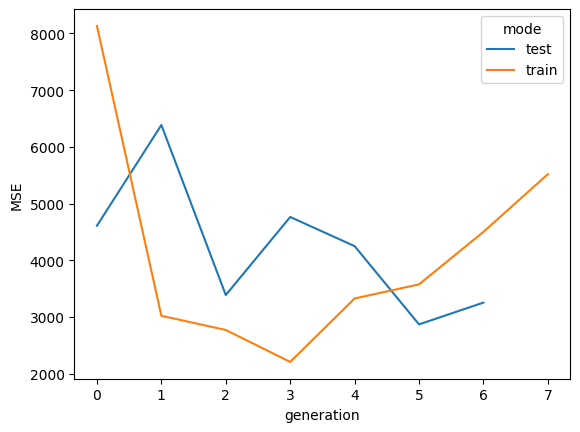

In [19]:
sns.lineplot(x="generation",y="MSE",hue="mode",data=result_df)

#plt.ylim(4000,12000)

<Axes: xlabel='Self-reasoning records', ylabel='MSE'>

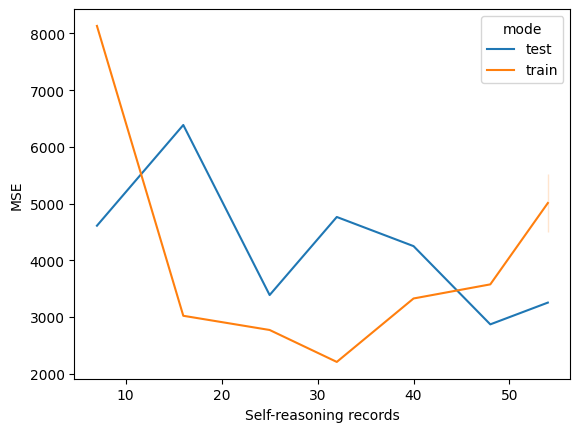

In [20]:

sns.lineplot(x="Self-reasoning records",y="MSE",hue="mode",data=result_df)

<Axes: xlabel='generation', ylabel='Self-reasoning records'>

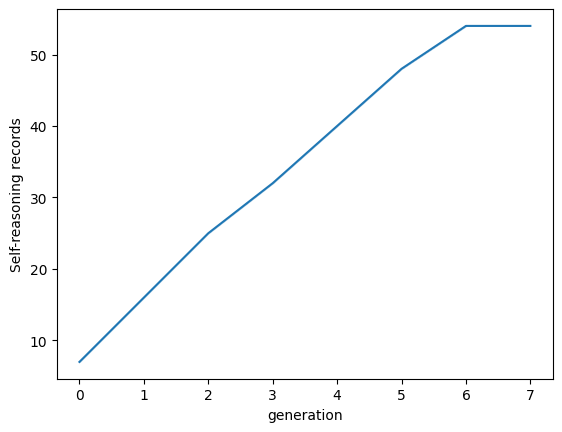

In [21]:

sns.lineplot(x="generation",y="Self-reasoning records",data=result_df)